In [18]:
import pandas as pd
import numpy as np
import gini

from util_data import DataSet

from sklearn.neighbors import KNeighborsRegressor

# added
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

import matplotlib.pyplot as plt

data = DataSet()

In [19]:
# I think we can use panda as an alternative for analysis, since it helps us gain more insights into the data

train = data.get_training_set()
test = data.get_testing_set()

## Finding the best model

Let's try a few models with standard parameters to find the best regressor

In [20]:
ListOfFunction = [LogisticRegression,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor]

In [21]:
# separate data and label
X = train.drop(['id','target'],axis=1) # drop id and target from X, since "id" wouldn't do much help for prediction
Y = train['target'].as_matrix()

We take a training set of size 200 000 (more than 30% of the set)

LogisticRegression
Gini: -0.003, Max. Gini: 0.482, Normalized Gini: -0.007


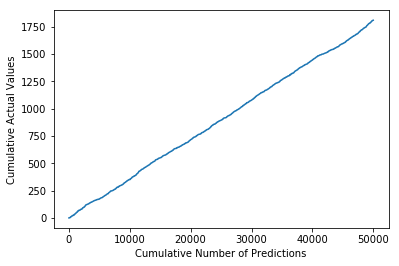

AdaBoostRegressor
Gini: 0.063, Max. Gini: 0.482, Normalized Gini: 0.131


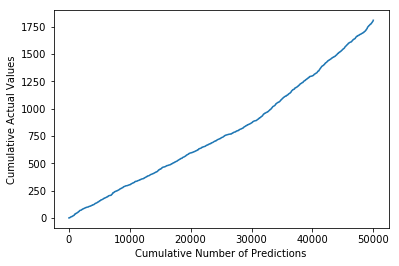

BaggingRegressor
Gini: 0.036, Max. Gini: 0.482, Normalized Gini: 0.075


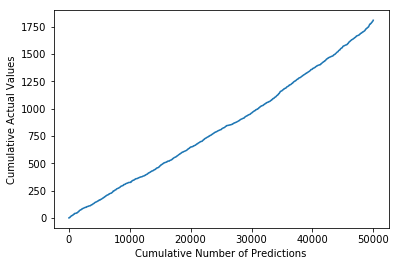

GradientBoostingRegressor
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247


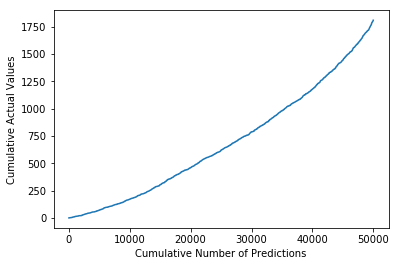

RandomForestRegressor
Gini: 0.043, Max. Gini: 0.482, Normalized Gini: 0.089


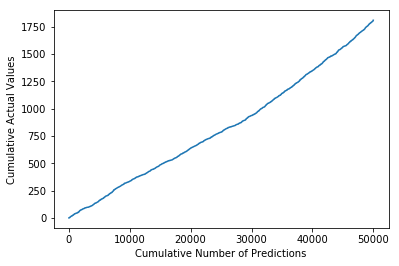

In [22]:
for func in ListOfFunction:
    rfc = func()
    rfc.fit(X[:200000],Y[:200000])
    Y_pred = rfc.predict(X[-50000:])
    print(func.__name__)
    gini.gini_visualization(Y[-50000:],Y_pred,True)

Clearly Gradient Boosting seems best by now

## Test on Gradient Boosting

Let's try to remove some unuseful features

RandomForestRegressor
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247


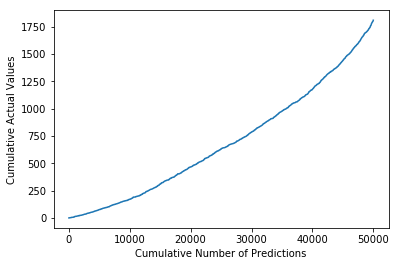

In [23]:
# When there is calc we remove (see first_examples notebook)
customX = X.drop(X.filter(like='calc').columns,axis=1)

rfc = GradientBoostingRegressor()
rfc.fit(X[:200000],Y[:200000])
Y_pred = rfc.predict(X[-50000:])
print(func.__name__)
gini.gini_visualization(Y[-50000:],Y_pred,True)

Let's make change in the number of estimators

RandomForestRegressorfor 10 classifiers
Gini: 0.107, Max. Gini: 0.482, Normalized Gini: 0.221


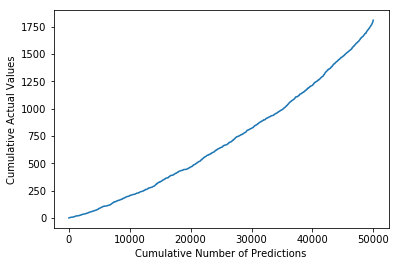

RandomForestRegressorfor 20 classifiers
Gini: 0.111, Max. Gini: 0.482, Normalized Gini: 0.231


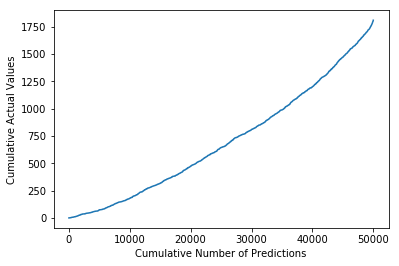

RandomForestRegressorfor 40 classifiers
Gini: 0.115, Max. Gini: 0.482, Normalized Gini: 0.239


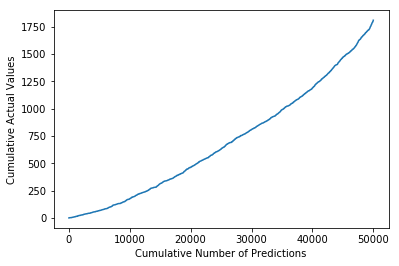

RandomForestRegressorfor 60 classifiers
Gini: 0.117, Max. Gini: 0.482, Normalized Gini: 0.243


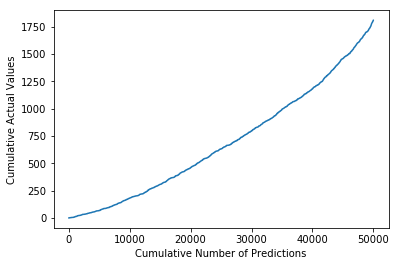

RandomForestRegressorfor 80 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.245


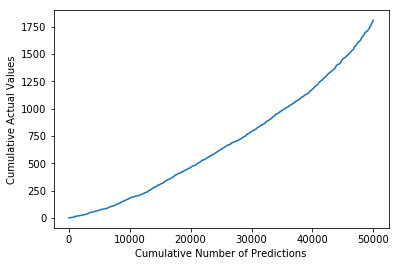

RandomForestRegressorfor 100 classifiers
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247


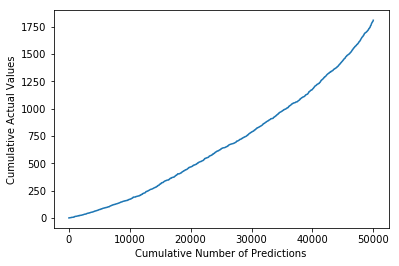

RandomForestRegressorfor 150 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.249


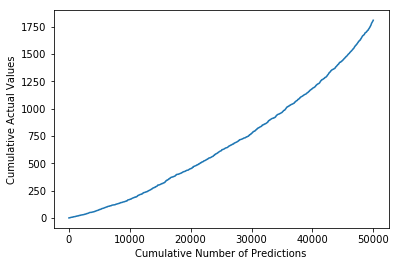

RandomForestRegressorfor 200 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.249


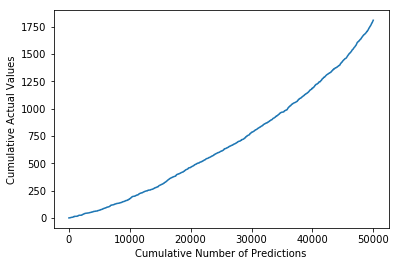

RandomForestRegressorfor 300 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.245


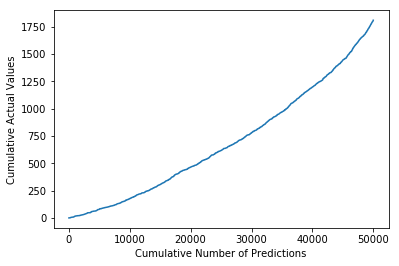

RandomForestRegressorfor 400 classifiers
Gini: 0.120, Max. Gini: 0.482, Normalized Gini: 0.248


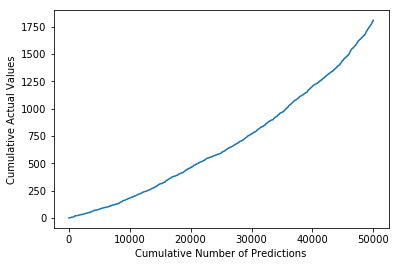

RandomForestRegressorfor 500 classifiers
Gini: 0.118, Max. Gini: 0.482, Normalized Gini: 0.246


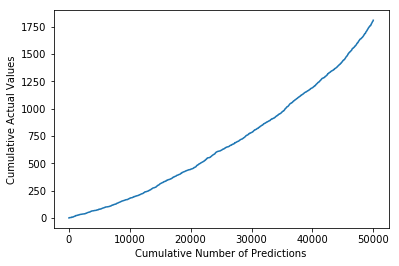

In [24]:
# When there is calc we remove (see first_examples notebook)
customX = X.drop(X.filter(like='calc').columns,axis=1)

numbers = [10,20,40,60,80,100,150,200,300,400,500]
results = []

for i in numbers:
    rfc = GradientBoostingRegressor(n_estimators = i)
    rfc.fit(X[:200000],Y[:200000])
    Y_pred = rfc.predict(X[-50000:])
    print(func.__name__ + " for "+str(i)+" classifiers")
    results.append(gini.gini_visualization(Y[-50000:],Y_pred,False))

Summary


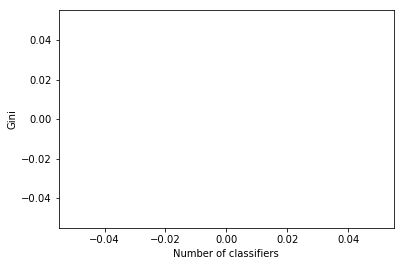

In [25]:
print("Summary")
plt.plot(numbers,results)
plt.xlabel('Number of classifiers')
plt.ylabel('Gini')
plt.show()

In [26]:
results

[None, None, None, None, None, None, None, None, None, None, None]